In [1]:
import gym
import numpy as np
from ddpg_agent import Agent
import time
import matplotlib.pyplot as plt

In [2]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")
    agent = Agent(n_actions=env.action_space.shape[0], alpha=0.001, beta=0.002,
                  env=env, gamma=0.99, mem_size=50000, tau=0.005, fc1_dims=400, fc2_dims=300, 
                  batch_size=64, noise=0.1, chkpt_dir='models/')
    n_games = 501

    best_score = env.reward_range[0]
    score_history = []
    load_checkpoint = False

    if load_checkpoint:
        agent.load_models()
        evaluate = True
    else:
        evaluate = False

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation, evaluate)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
            if not load_checkpoint:
                agent.save_models()

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))


c:\Users\Lenovo\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


... saving models ...
INFO:tensorflow:Assets written to: models/actor\assets
INFO:tensorflow:Assets written to: models/target_actor\assets
INFO:tensorflow:Assets written to: models/critic\assets
INFO:tensorflow:Assets written to: models/target_critic\assets
episode 0 score -1362.7 avg score -1362.7
... saving models ...
INFO:tensorflow:Assets written to: models/actor\assets
INFO:tensorflow:Assets written to: models/target_actor\assets
INFO:tensorflow:Assets written to: models/critic\assets
INFO:tensorflow:Assets written to: models/target_critic\assets
episode 1 score -1189.1 avg score -1275.9
... saving models ...
INFO:tensorflow:Assets written to: models/actor\assets
INFO:tensorflow:Assets written to: models/target_actor\assets
INFO:tensorflow:Assets written to: models/critic\assets
INFO:tensorflow:Assets written to: models/target_critic\assets
episode 2 score -1134.5 avg score -1228.7
episode 3 score -1361.4 avg score -1261.9
episode 4 score -1647.7 avg score -1339.1
episode 5 score 

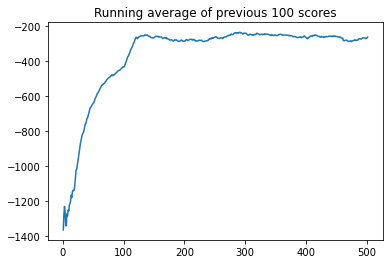

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)

In [17]:
scores = []
agent.load_models() 
evaluate = False

for i in range(100):
    obs = env.reset()
    actions = []
    score = 0
    while True:
        action = agent.choose_action(obs, evaluate)
        obs, reward, done, info = env.step(action)
        score += reward
        actions.append(action)

        if done:
            print(f"Done, points: {score}")
            break
    
    scores.append(score)
    
    env.close()

print(scores)

... loading models ...
Done, points: -124.93341169233076
Done, points: -360.62474813443157
Done, points: -0.5615808738221975
Done, points: -124.25701262119428
Done, points: -360.4767637167368
Done, points: -0.4201243215051565
Done, points: -243.50282912026552
Done, points: -242.54942776774362
Done, points: -239.2981051724352
Done, points: -581.3151042144689
Done, points: -126.14237632005494
Done, points: -374.8950684939565
Done, points: -248.79237641232018
Done, points: -0.4790380716639845
Done, points: -127.12823090980349
Done, points: -248.74248998054313
Done, points: -361.37273807767616
Done, points: -359.39517935483696
Done, points: -360.51127823850743
Done, points: -125.85154428406398
Done, points: -469.49304980942367
Done, points: -351.070149996167
Done, points: -472.11449368315783
Done, points: -122.59494035754993
Done, points: -126.03729862096696
Done, points: -125.38282294923019
Done, points: -240.45220861390902
Done, points: -122.64203435743381
Done, points: -120.568020935360

In [18]:
np.mean(scores)

-252.21884116674156